In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')   #한글처리
import seaborn as sns
import pandas as pd

In [2]:
df_ROS = pd.read_csv('../datasets/RecurrenceOfSurgery.csv')
df_ROS

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0


### 데이터 전처리
- 데이터의 갯수가 맞아야 함
- 대상 컬럼 의한 레코드 삭제 시 데이터셋 양 고려

In [3]:
df_ROS_data = df_ROS[['입원기간','통증기간(월)','연령','수술시간','디스크단면적','과거수술횟수','환자통증정도']]
df_ROS_data

,입원기간,통증기간(월),연령,수술시간,디스크단면적,과거수술횟수,환자통증정도
0,2,1.0,66,68.0,2048.50,0,10
1,1,1.0,47,31.0,1753.10,0,10
2,1,1.0,39,78.0,1749.00,1,7
3,1,2.0,40,73.0,1796.20,0,7
4,2,1.0,42,29.0,2021.48,0,7
...,...,...,...,...,...,...,...
1889,2,12.0,59,80.0,2652.20,0,7
1890,4,6.0,42,20.0,1795.80,0,7
1891,3,1.0,61,50.0,2624.40,0,7
1892,4,24.0,29,25.0,1972.50,0,7


### 상관관계 확인
- 궁금한 점 : 입원기간에 영향을 미치는 컬럼들
- 목표 변수 : '입원기간' -> 분포 : 언발란스
    - 연속형일 경우 : 정규화 확인
    - 범주형일 경우 : 밸런스 여부 확인
- 설명 변수 설정 : 
    - '과거수술횟수' : 과거 수술 횟수가 많을 수록 입원 기간이 길어짐
    - '연령' : : 상대적으로 나이 많으면 발생률이 높은 것으로 보임.
    - '환자통증정도' : 통증정도가 크면 입원기간이 길어짐
    - '통증기간(월)' : 통증기간은 보통 2달이제일 많았으며 분포는 1-2사이가 가장 많았다. 입원기간과 관계가 적다.
    - '수술시간' : 수술시간은 보통 62분에 중간값을 가지고 있었다.
    - '디스크단면적' : 단면적 크기에 따라 입원기간에 영향을 줌
    





In [4]:
df_ROS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   입원기간     1894 non-null   int64  
 1   통증기간(월)  1890 non-null   float64
 2   연령       1894 non-null   int64  
 3   수술시간     1840 non-null   float64
 4   디스크단면적   1893 non-null   float64
 5   과거수술횟수   1894 non-null   int64  
 6   환자통증정도   1894 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 103.7 KB


### EDA 전략
- 목표 변수와 각 설명 변수의 관계 확인
- 해당 변수(목표와 설명) 선택

In [5]:
df_ROS_data.corr()

,입원기간,통증기간(월),연령,수술시간,디스크단면적,과거수술횟수,환자통증정도
입원기간,1.000000,0.007039,0.050292,-0.041940,0.012879,0.052581,0.049644
통증기간(월),0.007039,1.000000,0.018530,-0.063319,0.036376,-0.009783,-0.067165
연령,0.050292,0.018530,1.000000,0.041366,0.169836,0.136645,0.052742
수술시간,-0.041940,-0.063319,0.041366,1.000000,0.025788,-0.029981,0.055092
디스크단면적,0.012879,0.036376,0.169836,0.025788,1.000000,0.070998,-0.022274
과거수술횟수,0.052581,-0.009783,0.136645,-0.029981,0.070998,1.000000,0.006479
환자통증정도,0.049644,-0.067165,0.052742,0.055092,-0.022274,0.006479,1.000000


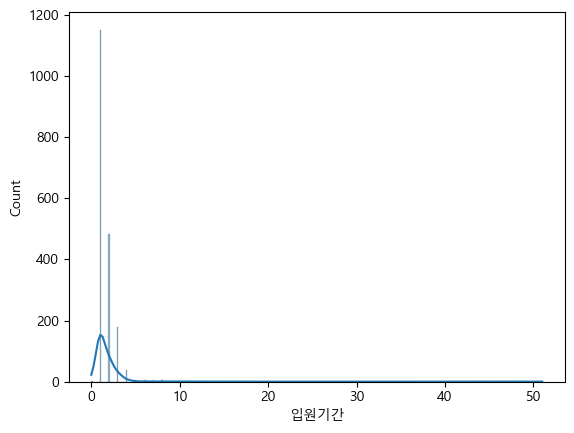

In [6]:
sns.histplot(data=df_ROS_data, x='입원기간',kde=True)
plt.show()

In [7]:
df_ROS_data['입원기간'].value_counts()

1     1152
2      483
3      180
4       39
8        6
5        6
6        4
7        4
0        3
17       3
11       3
27       1
46       1
9        1
18       1
16       1
44       1
13       1
15       1
51       1
12       1
10       1
Name: 입원기간, dtype: int64

<Axes: xlabel='입원기간', ylabel='count'>

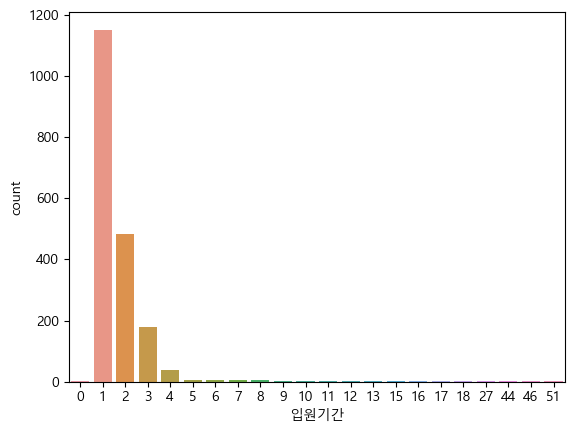

In [8]:
sns.countplot(data=df_ROS_data, x='입원기간')

#### 범주형과 연속형(순서형)으로 dtype변형

In [2]:
df_ROS_data[['과거수술횟수','환자통증정도']] = df_ROS_data[['과거수술횟수','환자통증정도']].astype(object)
df_ROS_data.info()

NameError: name 'df_ROS_data' is not defined

### 시각화 확인


#### 변수간에 상관성 확인
- 목표 변수는 정규화 여부 판단
- 목표 변수와 각 설명 변수 간에 관계 확인

In [14]:
df_ROS_data.describe()

,입원기간,통증기간(월),연령,수술시간,디스크단면적
count,1894.000000,1890.000000,1894.000000,1840.000000,1893.000000
mean,1.736536,5.879841,41.463569,62.066304,1989.788774
std,2.344085,17.241970,13.444629,24.994615,314.478436
min,0.000000,0.000000,15.000000,5.000000,1145.800000
25%,1.000000,1.000000,32.000000,45.000000,1777.000000
50%,1.000000,2.000000,41.000000,60.000000,1985.500000
75%,2.000000,4.000000,49.000000,77.000000,2178.500000
max,51.000000,360.000000,86.000000,220.000000,3214.200000


In [15]:
df_ROS_data_yeonsok = df_ROS_data.describe().columns.to_list() #연속형 분포도 확인
df_ROS_data_yeonsok

['입원기간', '통증기간(월)', '연령', '수술시간', '디스크단면적']

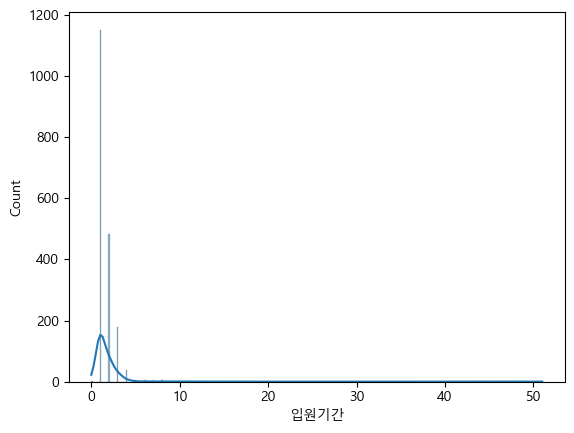

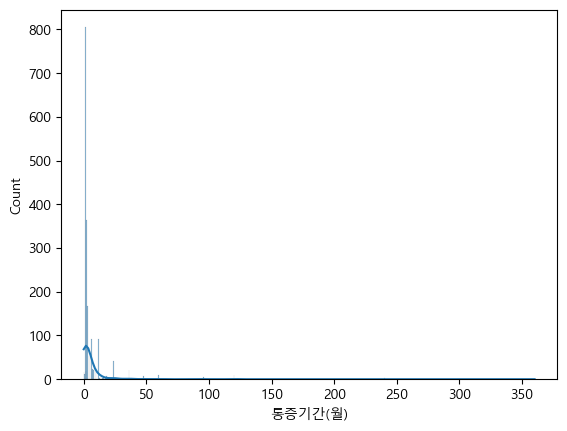

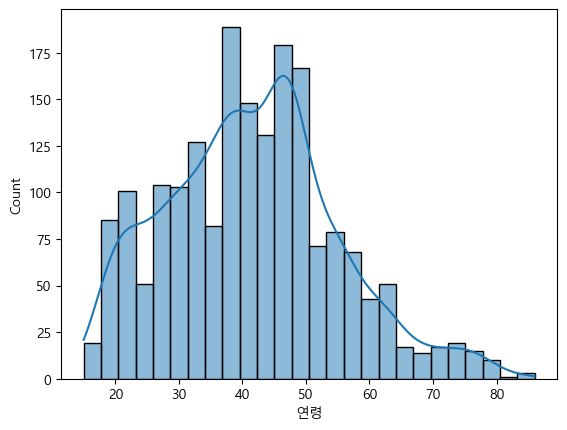

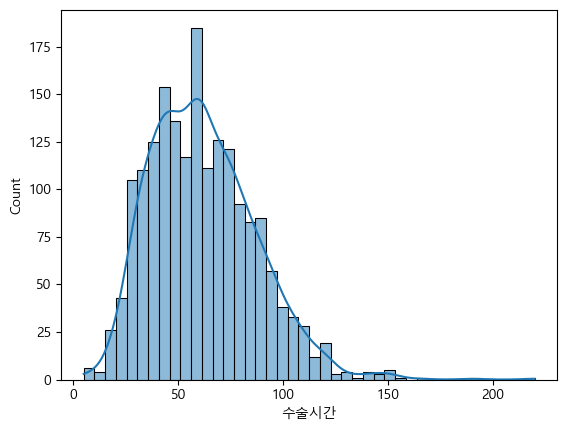

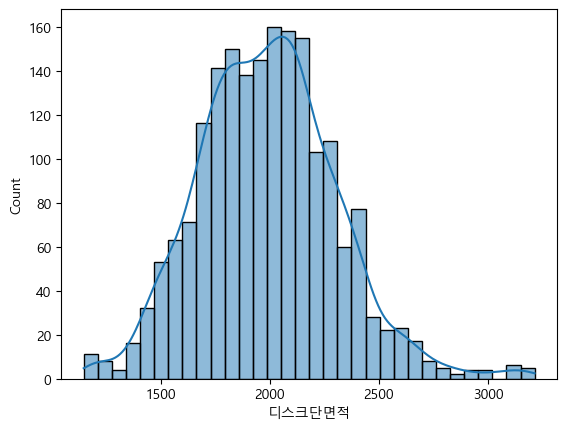

In [18]:
for row in df_ROS_data_yeonsok:
    sns.histplot(data=df_ROS_data, x=row, kde=True)
    plt.show() 

In [17]:
df_ROS_data_beomju = df_ROS_data.describe(include=object).columns.to_list()
df_ROS_data_beomju

['과거수술횟수', '환자통증정도']

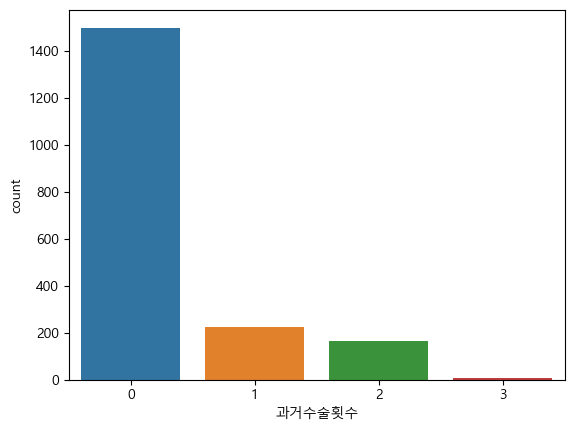

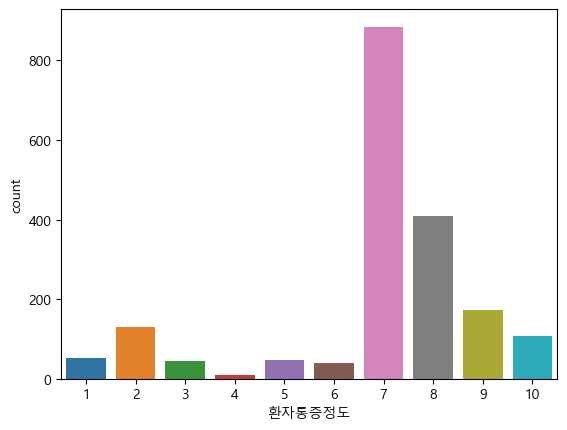

In [19]:
for row in df_ROS_data_beomju :
    sns.countplot(data=df_ROS_data, x=row)
    plt.show()

#### 연속형 / 범주형

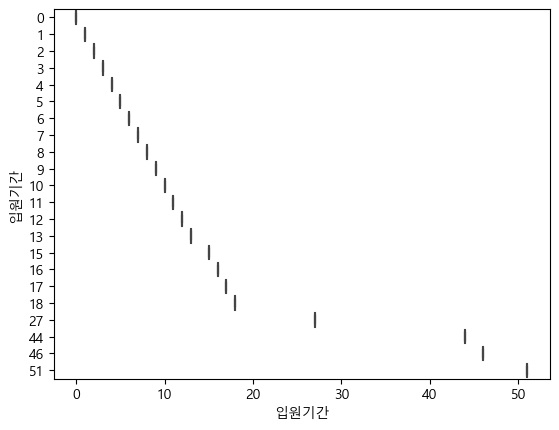

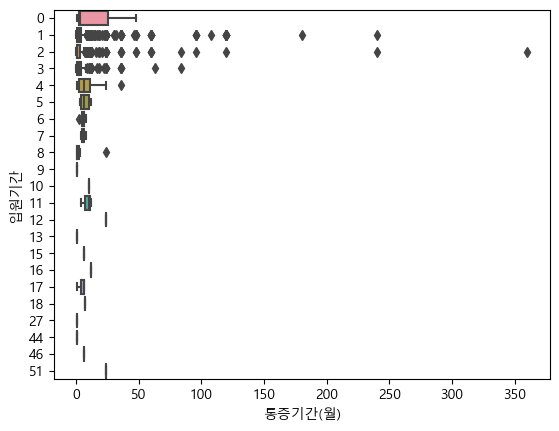

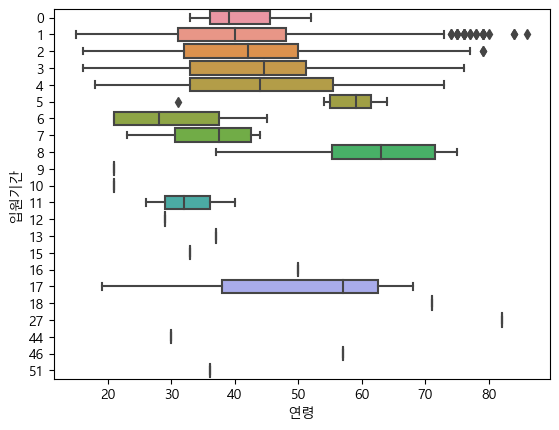

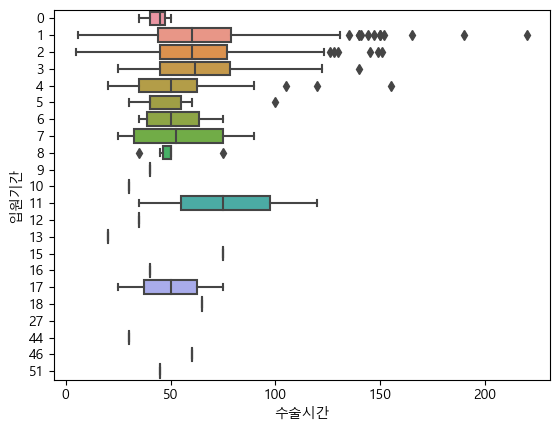

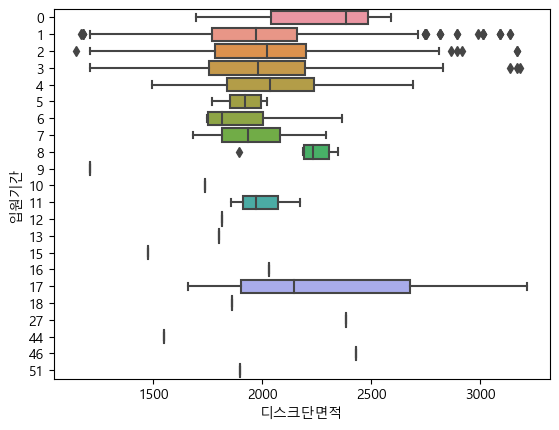

In [20]:
for row in df_ROS_data_yeonsok :
    sns.boxplot(data=df_ROS_data, x=row, y='입원기간',orient='h')
    plt.show()

#### 범주형 / 범주형 

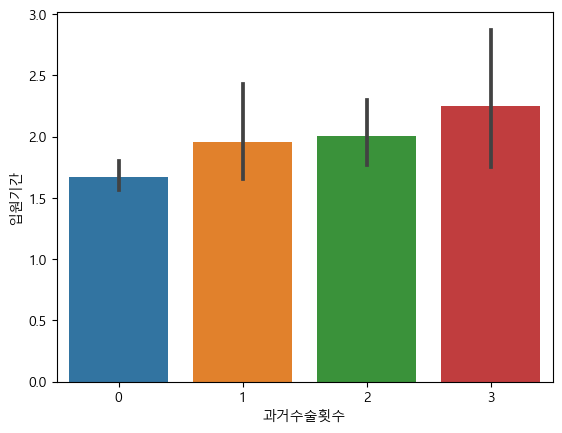

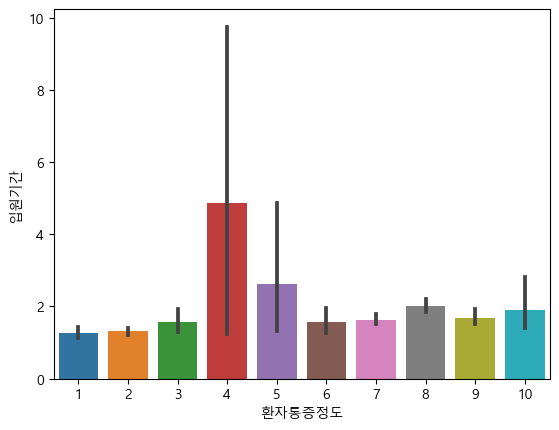

In [21]:
for row in df_ROS_data_beomju :
    sns.barplot(data=df_ROS_data, x=row, y='입원기간')
    plt.show()